# Will "RAIN" or NOT

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weather_data=pd.read_csv('./weatherAUS.csv')

In [3]:
pd.options.display.max_columns=30

In [4]:
weather_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
weather_data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
weather_data.shape

(145460, 23)

In [7]:
weather_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [8]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### no. of columns take few memory usages

In [9]:
print(f'memory usage --> {np.sum(weather_data.memory_usage()/1024/1024)} MB,\n')
weather_data.memory_usage()/1024/1024                    

memory usage --> 25.524871826171875 MB,



Index            0.000122
Date             1.109772
Location         1.109772
MinTemp          1.109772
MaxTemp          1.109772
Rainfall         1.109772
Evaporation      1.109772
Sunshine         1.109772
WindGustDir      1.109772
WindGustSpeed    1.109772
WindDir9am       1.109772
WindDir3pm       1.109772
WindSpeed9am     1.109772
WindSpeed3pm     1.109772
Humidity9am      1.109772
Humidity3pm      1.109772
Pressure9am      1.109772
Pressure3pm      1.109772
Cloud9am         1.109772
Cloud3pm         1.109772
Temp9am          1.109772
Temp3pm          1.109772
RainToday        1.109772
RainTomorrow     1.109772
dtype: float64

###  no.  MISSING VALUES IN ```PERCENTAGEE```

In [10]:
TOTAL_AMOUNT=weather_data.size
MISSING=weather_data.isna().sum().sum()
print('TOTAL MISSING VALUES  IN DATA', MISSING,'\n')
print(f'{MISSING/TOTAL_AMOUNT*100}% is missing values')

TOTAL MISSING VALUES  IN DATA 343248 

10.259745694319072% is missing values


### no. MISSING VALUES DROP FROM ROW =0

In [11]:
weather_data.dropna(axis=0,inplace=True)

###  no. nunique N is nu uninqe

In [12]:
weather_data.nunique()

Date             3416
Location           26
MinTemp           348
MaxTemp           395
Rainfall          410
Evaporation       259
Sunshine          145
WindGustDir        16
WindGustSpeed      61
WindDir9am         16
WindDir3pm         16
WindSpeed9am       36
WindSpeed3pm       37
Humidity9am       101
Humidity3pm       101
Pressure9am       504
Pressure3pm       507
Cloud9am            9
Cloud3pm           10
Temp9am           383
Temp3pm           393
RainToday           2
RainTomorrow        2
dtype: int64

## no. (SAMPLE DATA) HEAR YOU SEE RANDOM DATA WITHOUT ANY N/A VALUES

In [13]:
weather_data.sample(4)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
67397,2009-01-14,Melbourne,20.4,32.6,0.0,18.6,12.3,N,57.0,N,S,35.0,24.0,14.0,64.0,1008.0,1009.5,3.0,4.0,32.2,22.7,No,No
107207,2013-10-01,Woomera,10.4,20.7,5.0,11.6,11.4,SW,57.0,SSW,SW,26.0,24.0,54.0,22.0,1016.9,1016.4,1.0,1.0,14.1,19.8,Yes,No
95209,2014-06-11,Townsville,18.3,26.8,0.0,3.0,10.0,SSE,44.0,SSE,E,17.0,22.0,58.0,56.0,1015.4,1012.1,1.0,5.0,23.1,25.3,No,No
94422,2012-02-16,Townsville,23.6,31.9,1.6,8.6,10.0,SE,43.0,ESE,ENE,20.0,24.0,64.0,49.0,1013.6,1010.9,6.0,3.0,29.4,31.3,Yes,No


In [14]:
weather_data.select_dtypes('object')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,SSW,ENE,SW,No,No
6050,2009-01-02,Cobar,S,SSE,SSE,No,No
6052,2009-01-04,Cobar,NNE,NNE,NNW,No,No
6053,2009-01-05,Cobar,WNW,WNW,WSW,No,No
6054,2009-01-06,Cobar,WNW,NW,WNW,No,No
...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,ENE,SE,NE,No,No
142299,2017-06-21,Darwin,E,SE,SE,No,No
142300,2017-06-22,Darwin,E,E,W,No,No
142301,2017-06-23,Darwin,ESE,SE,NNW,No,No


#####  Datetime (object ----> datetime64)

In [15]:
weather_data.insert(0 ,'DATE' ,pd.to_datetime(weather_data['Date']))

In [16]:
weather_data.drop(columns='Date',inplace=True)

#  NOW DATA IS READY FOR GET OUT INSIDE INFROMATION INTO DATA 

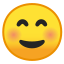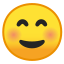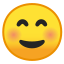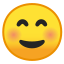

In [17]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATE           56420 non-null  datetime64[ns]
 1   Location       56420 non-null  object        
 2   MinTemp        56420 non-null  float64       
 3   MaxTemp        56420 non-null  float64       
 4   Rainfall       56420 non-null  float64       
 5   Evaporation    56420 non-null  float64       
 6   Sunshine       56420 non-null  float64       
 7   WindGustDir    56420 non-null  object        
 8   WindGustSpeed  56420 non-null  float64       
 9   WindDir9am     56420 non-null  object        
 10  WindDir3pm     56420 non-null  object        
 11  WindSpeed9am   56420 non-null  float64       
 12  WindSpeed3pm   56420 non-null  float64       
 13  Humidity9am    56420 non-null  float64       
 14  Humidity3pm    56420 non-null  float64       
 15  Pressure9am    

`CLOUD , RAIN , TEMP , PRESSURE , HUMIDITY, WINDSPEED, WINDDIR,` 

THIS COLOUMN ARE DIVIDED INTO TIME 

`if we think all columns seperatly without time limit`

In [18]:
weather_data.sample(3)

,DATE,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
101705,2015-03-01,MountGambier,10.3,22.5,2.0,6.0,10.1,S,43.0,S,S,24.0,28.0,78.0,46.0,1014.6,1017.2,5.0,7.0,16.5,19.6,Yes,No
106175,2010-09-06,Woomera,5.8,16.8,0.4,4.4,8.5,S,20.0,S,SW,13.0,9.0,81.0,39.0,1025.7,1023.4,0.0,4.0,10.8,15.9,No,No
137667,2013-07-13,AliceSprings,11.7,28.5,0.0,5.0,8.4,NW,48.0,NNE,NW,13.0,17.0,50.0,33.0,1019.0,1015.4,5.0,6.0,20.3,27.1,No,No


DATA AROUND THIS DATEmedianGE

In [19]:
print( 'START TO END\t',weather_data['DATE'].min() ,' \tto\t', weather_data['DATE'].max())

START TO END	 2007-11-01 00:00:00  	to	 2017-06-25 00:00:00


In [20]:
weather_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,56420.0,13.464770,6.416689,-6.7,8.6,13.2,18.4,31.4
MaxTemp,56420.0,24.219206,6.970676,4.1,18.7,23.9,29.7,48.1
Rainfall,56420.0,2.130397,7.014822,0.0,0.0,0.0,0.6,206.2
Evaporation,56420.0,5.503135,3.696282,0.0,2.8,5.0,7.4,81.2
Sunshine,56420.0,7.735626,3.758153,0.0,5.0,8.6,10.7,14.5
WindGustSpeed,56420.0,40.877366,13.335232,9.0,31.0,39.0,48.0,124.0
WindSpeed9am,56420.0,15.667228,8.317005,2.0,9.0,15.0,20.0,67.0
WindSpeed3pm,56420.0,19.786778,8.510180,2.0,13.0,19.0,26.0,76.0
Humidity9am,56420.0,65.874123,18.513289,0.0,55.0,67.0,79.0,100.0
Humidity3pm,56420.0,49.601985,20.197040,0.0,35.0,50.0,63.0,100.0


## no. YOU NOTICE HERE old data shape (145460, 23) drop to blow cell shape 

` IF YOU NEED ALL DATA USE FILLEN WITHOUT LOSSING ANY DATA`

In [21]:
weather_data.shape

(56420, 23)

In [22]:
weather_data['Location'].nunique()

26

In [23]:
weather_data['Location'].value_counts()          # .keys()

Darwin              3062
Perth               3025
Brisbane            2953
MelbourneAirport    2929
PerthAirport        2913
SydneyAirport       2870
Watsonia            2730
Mildura             2594
MountGambier        2465
NorfolkIsland       2464
Cairns              2444
Townsville          2419
WaggaWagga          2416
AliceSprings        2223
Nuriootpa           2008
Hobart              1939
Moree               1913
Melbourne           1898
Portland            1863
Woomera             1734
Sydney              1690
Sale                1678
CoffsHarbour        1380
Williamtown         1198
Canberra            1078
Cobar                534
Name: Location, dtype: int64

###  SORT BY THE MAX TEMPRETURE ALL DATA

In [24]:
sortBY_max_tamp=weather_data.sort_values(by='MaxTemp',ascending=False).head(10).copy()

In [25]:
sortBY_max_tamp

,DATE,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
106316,2011-01-25,Woomera,25.1,48.1,0.0,22.4,12.8,WSW,85.0,NNE,NW,37.0,43.0,21.0,7.0,1003.4,1000.4,3.0,2.0,33.2,46.1,No,No
13806,2014-01-03,Moree,28.3,47.3,0.0,16.0,12.0,WSW,61.0,N,WNW,33.0,33.0,36.0,5.0,1001.9,995.9,1.0,6.0,33.4,45.8,No,No
107299,2014-01-01,Woomera,28.0,46.8,0.0,23.8,13.0,NNW,74.0,N,NW,46.0,37.0,3.0,1.0,1005.7,1003.0,0.0,1.0,34.9,45.8,No,No
64228,2009-02-07,MelbourneAirport,18.8,46.8,0.0,10.8,8.5,SW,83.0,N,NW,54.0,39.0,21.0,10.0,1003.1,998.8,2.0,1.0,32.7,46.1,No,Yes
70430,2009-02-07,Mildura,26.1,46.7,0.0,13.2,11.7,NNW,56.0,NNE,NW,24.0,31.0,11.0,10.0,1004.4,1002.9,0.0,2.0,36.4,46.1,No,No
78026,2009-02-07,Watsonia,18.0,46.7,0.0,10.8,8.5,NNW,74.0,NE,NW,6.0,41.0,38.0,8.0,1003.0,998.2,2.0,1.0,30.3,45.2,No,No
34937,2013-01-18,SydneyAirport,22.7,46.4,0.0,9.0,8.4,S,87.0,N,W,15.0,17.0,56.0,13.0,1002.7,997.5,0.0,3.0,29.3,44.9,No,Yes
67421,2009-02-07,Melbourne,18.7,46.4,0.0,10.8,8.5,SW,83.0,N,NW,54.0,39.0,23.0,6.0,1003.1,998.3,3.0,1.0,33.1,45.4,No,No
73265,2017-02-09,Mildura,28.8,46.3,0.0,15.0,12.0,N,54.0,N,NW,28.0,19.0,28.0,13.0,1009.9,1006.9,2.0,1.0,36.1,44.8,No,No
105599,2009-02-07,Woomera,31.4,46.2,0.0,22.0,12.6,NNW,61.0,NW,N,30.0,22.0,18.0,7.0,1004.4,1003.0,1.0,1.0,37.9,45.3,No,No


In [26]:
sortBY_max_tamp.Location.head(10).value_counts()

Woomera             3
Mildura             2
Watsonia            1
MelbourneAirport    1
SydneyAirport       1
Melbourne           1
Moree               1
Name: Location, dtype: int64

###  TOP 10 MAX TEMP IN STATE

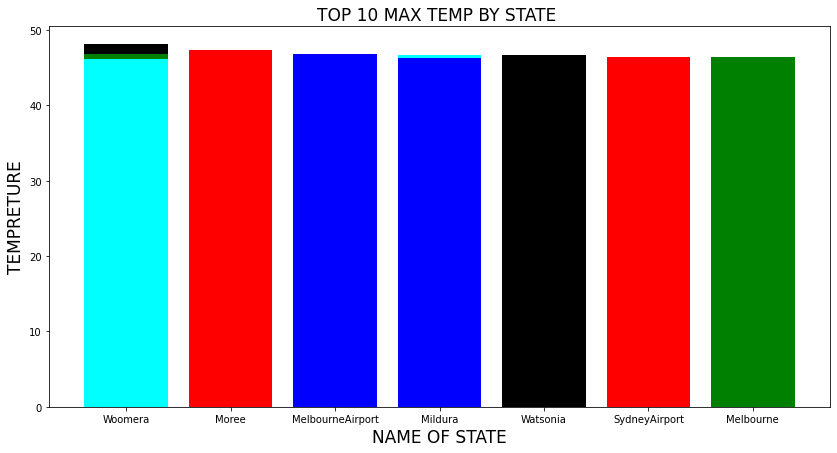

In [27]:
plt.figure(figsize=(14,7))
plt.bar(sortBY_max_tamp['Location'],sortBY_max_tamp['MaxTemp'],color=['black', 'red', 'green', 'blue', 'cyan'],)
plt.title('TOP 10 MAX TEMP BY STATE ',fontsize=17)
plt.xlabel('NAME OF STATE',fontsize=17)
plt.ylabel('TEMPRETURE',fontsize=17)
plt.show()


##  TOP 10 MIN TEMPRETURE

In [28]:
weather_data.sample(4)

,DATE,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
119615,2014-09-07,PerthAirport,14.3,18.9,7.0,3.4,2.6,WNW,81.0,WNW,NW,15.0,26.0,61.0,60.0,1010.0,1006.7,7.0,7.0,16.4,18.4,Yes,Yes
68619,2012-06-19,Melbourne,8.1,14.8,1.0,2.0,6.9,WSW,46.0,WSW,SSE,19.0,15.0,69.0,45.0,1024.7,1023.4,6.0,5.0,8.7,13.2,No,No
9513,2010-04-01,CoffsHarbour,17.5,25.1,18.2,2.6,7.4,S,28.0,SW,SSE,9.0,17.0,75.0,61.0,1016.7,1015.1,1.0,3.0,21.5,24.6,Yes,No
94172,2011-06-11,Townsville,13.3,18.5,6.2,3.0,0.4,SW,43.0,SW,SSW,24.0,19.0,74.0,64.0,1015.2,1012.5,6.0,7.0,14.5,18.0,Yes,No


In [29]:
sortBy_mintemp=weather_data.sort_values(by='MinTemp',ascending=True).head(10).copy()

In [30]:
sortBy_mintemp.Location.head(10).value_counts()

Canberra        6
AliceSprings    3
WaggaWagga      1
Name: Location, dtype: int64

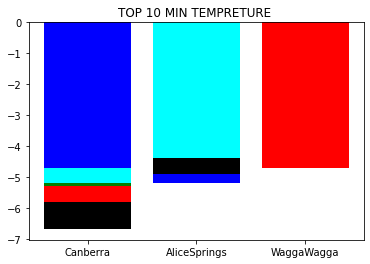

In [31]:
plt.bar(sortBy_mintemp['Location'],sortBy_mintemp['MinTemp'],color=['black', 'red', 'green', 'blue', 'cyan'],)
plt.title('TOP 10 MIN TEMPRETURE ')


plt.show()

In [32]:
weather_data.groupby('Location',sort = False)['MinTemp'].min().nsmallest()

Location
Canberra       -6.7
AliceSprings   -5.2
WaggaWagga     -4.7
Sale           -3.9
Nuriootpa      -3.5
Name: MinTemp, dtype: float64